In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.linalg import toeplitz
#import scipy.sparse.linalg
%matplotlib inline

In [2]:

def stochastic_sd(arr, n=10000, seed=0):
    '''Estimate the standard deviation of an array by considering only the 
    subset of its elements.
    
    Parameters
    ----------
    n : int
        The number of elements to consider. If the array contains fewer elements,
        use all.
    seed : int
        The seed for the random number generator.
    '''
    arr = np.asarray(arr)
    if arr.size < n: 
        return np.sqrt(arr.var())
    else:
        return np.sqrt(
            np.random.RandomState(seed).choice(arr.flat, n, replace=True).var())

    

def is_symmetric(mat):
    """
    Check if a matrix is symmetric.
    """

    maxDiff = np.abs(mat - mat.T).max()
    return maxDiff < stochastic_sd(mat) * 1e-7 + 1e-5


In [3]:
#np.random.random?
m=100
M_test=np.zeros((m,m),dtype=np.float)+0.1*np.random.random((m,m))



In [217]:

# with non-symmetric noise ...
M_test=np.zeros((m,m),dtype=np.float)+0.1*np.random.random((m,m))

my_noise = np.random.random((m,m))

# print(my_noise)
# just checking my understanding of symmetric noise ....
print(is_symmetric(my_noise))
print(is_symmetric(my_noise+my_noise.T))

# sym noise with distro [0,2)
sym_noise = my_noise+my_noise.T
# print(sym_noise)
# sym noise with distro [0,1)
sym_noise *= 0.5

# with symmetric noise ...
M_test=np.zeros((m,m),dtype=np.float)#+0.1*sym_noise

# print(M_test)

M_test[:25,:]+=2
M_test[50:75,:]+=2
M_test[:,:25]+=2
M_test[:,50:75]+=2


M_test-=1
# 
#print(M_test)
#plt.imshow(M_test)
evals1,evecs1=np.linalg.eig(M_test)

M1=M_test

# try using other eigendecomposition methods
# 1. scipy.sparse.linalg.eigsh for symetric matrices - should not have anyhting imaginary 
# 2. scipy.sparse.linalg.eigs for not neccessarily symmetric matrices , i.e. more general - expected small imaginry numbers
# 3. cooltools.numutils.get_eig

# beware of eigenvectors being rows vs columns - that changes from function to function ...
# enforce symmetry when needed - numerical algorithms that are not written for symmetrical mat-s might introduce small imaginary noise for matrices that actually symmetrical....

# later we'll try to see if SingularValue Decomposition would work for us or not - that's for non-square matrices ....

False
True


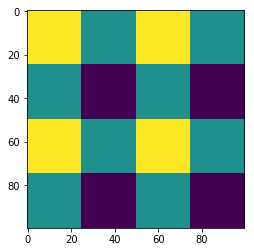

In [218]:
plt.imshow(M_test)
plt.show()

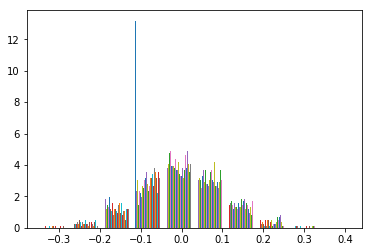

In [140]:
plt.hist(evecs,density=True)
plt.show()

In [170]:
# with symmetric noise ...
M_test=np.zeros((m,m))

# print(M_test)

M_test[:25,:25]+=2
M_test[:25,50:75]+=2

M_test[50:75,:25]+=2
M_test[50:75,50:75]+=2

M_test[75:100,75:100]+=2
M_test[75:100,25:50]+=2

M_test[25:50,25:50]+=2
M_test[25:50,75:100]+=2

M2=M_test
#M_test[75:100,75:100]+=2


#M_test-=1
# 
#print(M_test)
#plt.imshow(M_test)
evals2,evecs2=np.linalg.eig(M2)

In [201]:
M2 = M_test
# M2 = (M2 - M2.mean())/M2.mean()


In [224]:
M1
M1xxx = (M1 - M1.mean())/M1.std()

In [225]:
#plt.imshow(np.cov(M2))
evals2,evecs2=np.linalg.eigh(M1xxx)

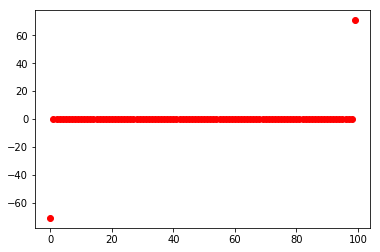

In [226]:
plt.plot(evals2,'ro')

(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([-1.41421356e-01, -1.27279221e-01, -1.13137085e-01, -9.89949494e-02,
        -8.48528137e-02, -7.07106781e-02, -5.65685425e-02, -4.24264069e-02,
        -2.82842712e-02, -1.41421356e-02,  1.81897913e-17]),
 <a list of 10 Patch objects>)

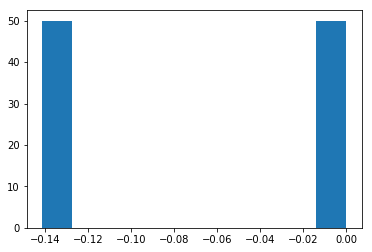

In [228]:
plt.hist(evecs2[:,0])

(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([-0.14142136, -0.12727922, -0.11313708, -0.09899495, -0.08485281,
        -0.07071068, -0.05656854, -0.04242641, -0.02828427, -0.01414214,
         0.        ]),
 <a list of 10 Patch objects>)

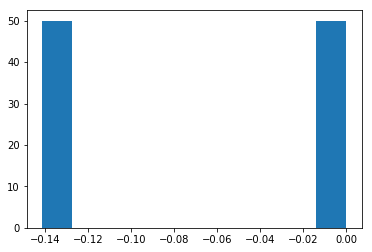

In [205]:
plt.hist(evecs2[:,98])

In [185]:
np.linalg.eigh?

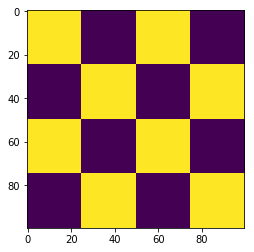

In [171]:
plt.imshow(M2)
plt.show()

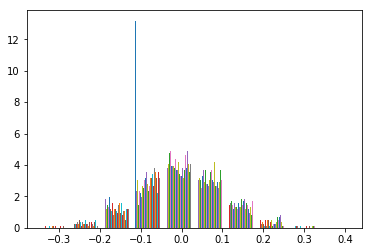

In [172]:
plt.hist(evecs,density=True)
plt.show()

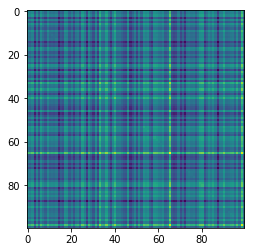

In [150]:
M1_cov=np.cov(M1)
M2_cov=np.cov(M2)

plt.imshow(M1_cov)
plt.show()
#plt.scatter(M1,M2)

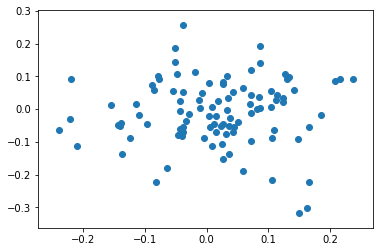

In [149]:
plt.scatter(evecs1[1],evecs1[2])
plt.show()

In [160]:
#M=np.array([[90,60,90],[90,90,30],[60,60,60],[60,60,90],[30,30,30]])

M=np.array([[90,90,60,60,30],[60,90,60,60,30],[90,30,60,90,30]])

print(M)
print(M.shape)

[[90 90 60 60 30]
 [60 90 60 60 30]
 [90 30 60 90 30]]
(3, 5)


In [163]:
m_cov=np.cov(M,ddof=0)
print(m_cov)

[[504. 360. 180.]
 [360. 360.   0.]
 [180.   0. 720.]]


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/betulakgoloksuz/Documents/miniconda3/envs/cooler-env/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/betulakgoloksuz/Documents/miniconda3/envs/cooler-env/lib/python3.6/site-packages/numpy/lib/histograms.py:839: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/Users/betulakgoloksuz/Documents/miniconda3/envs/cooler-env/lib/python3.6/site-packages/numpy/lib/histograms.py:892: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
/Users/betulakgoloksuz/Documents/miniconda3/envs/cooler-env/lib/python3.6/site-packages/matplotlib/transforms.py:827: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/Users/betulakgoloksuz/Documents/miniconda3/envs/

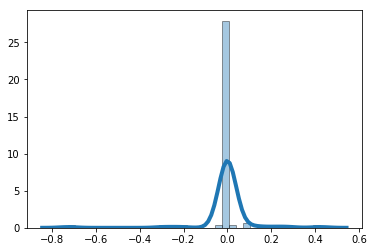

In [230]:
#plt.plot(evecs1,evecs2)
#plt.show()
#ax = plt.subplot(1,2)
#ax.hist(evecs1,density=True)
#ax.hist(evecs2,density=True)
#plt.show()

sns.distplot(evecs1[:,99], hist=True, kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

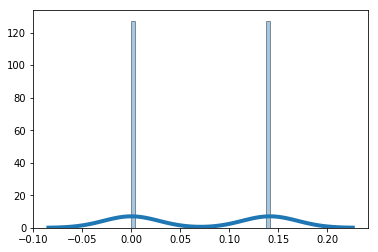

In [232]:
sns.distplot(evecs2[:,99],hist=True, kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

In [ ]:
# to create a symmetric matrix

M_test_vector=np.random.random((m,1))
M_symmetric=np.matmul(M_test_vector,M_test_vector.T)
plt.imshow(M_symmetric)
print(is_symmetric(M_symmetric))
evals,evecs=np.linalg.eig(M_symmetric)

print(evals)
#print(evecs)
#plt.bar(range(m),evals)

[-1.44339811e+01+0.00000000e+00j -1.08853898e-16+0.00000000e+00j
  4.43398113e+00+0.00000000e+00j  4.29619789e-32+0.00000000e+00j
 -3.33066907e-16+5.55111512e-17j -3.33066907e-16-5.55111512e-17j
 -3.08148791e-33+0.00000000e+00j -3.42113883e-49+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]


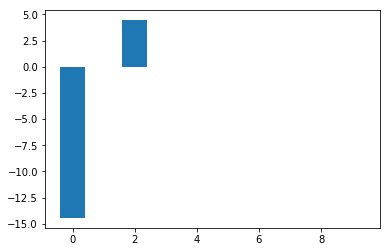

In [65]:

M_test=np.zeros((m,m),dtype=np.float)
M_test[:5,5:]+=2
M_test[5:,:5]+=2
M_test-=1
M_test[5:9,3:5]+=8
evals,evecs=np.linalg.eig(M_test)

plt.bar(range(m),evals)
#print(M_test)
print(evals)
i=1
#plt.imshow(np.outer(evecs[:,i],evecs[:,i]))
#aaa = [evals[i]*np.outer(evecs[:,i],evecs[:,i]) for i in range(m)]
#plt.imshow(sum(aaa))
#plt.imshow(0*np.outer(evecs[:,0],evecs[:,0])-np.outer(evecs[:,1],evecs[:,1]))
#print(aaa)

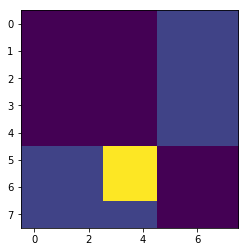

In [66]:
mask = np.asarray([1,1,1,1,1,1,1,0,0,1],dtype=np.bool)
M_test[mask,:][:,mask].shape
plt.imshow(M_test[mask,:][:,mask])

<BarContainer object of 10 artists>

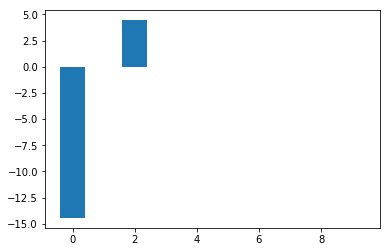

In [67]:
# plt.bar(range(m),np.abs(evals))
plt.bar(range(m),evals)

In [68]:
evecs

array([[ 2.05053221e-01+0.00000000e+00j,  8.94427191e-01+0.00000000e+00j,
        -1.73508142e-01+0.00000000e+00j, -8.59513842e-01+0.00000000e+00j,
        -3.76789606e-01-3.98797434e-02j, -3.76789606e-01+3.98797434e-02j,
         4.67571691e-17+0.00000000e+00j,  3.34552896e-16+0.00000000e+00j,
         4.20729659e-16+0.00000000e+00j,  2.10141900e-16+0.00000000e+00j],
       [ 2.05053221e-01+0.00000000e+00j, -3.41171077e-17+0.00000000e+00j,
        -1.73508142e-01+0.00000000e+00j,  2.48690175e-02+0.00000000e+00j,
        -2.83517067e-01+1.40125779e-01j, -2.83517067e-01-1.40125779e-01j,
         6.16749353e-17+0.00000000e+00j,  4.63120929e-17+0.00000000e+00j,
         3.69337977e-17+0.00000000e+00j,  5.20459340e-17+0.00000000e+00j],
       [ 2.05053221e-01+0.00000000e+00j,  2.04702646e-17+0.00000000e+00j,
        -1.73508142e-01+0.00000000e+00j, -6.62180252e-02+0.00000000e+00j,
        -5.98258454e-01+0.00000000e+00j, -5.98258454e-01-0.00000000e+00j,
         3.33014990e-17+0.00000000e+

TypeError: Image data cannot be converted to float

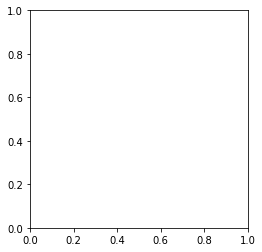

In [69]:
plt.imshow(evecs.T)

TypeError: Image data cannot be converted to float

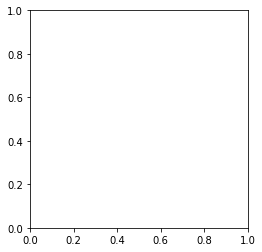

In [70]:
i=1
plt.imshow(np.outer(evecs[:,i],evecs[:,i]))

In [ ]:
plt.imshow(0*np.outer(evecs[:,0],evecs[:,0])-np.outer(evecs[:,1],evecs[:,1]))

In [ ]:
aaa = [evals[i]*np.outer(evecs[:,i],evecs[:,i]) for i in range(m)]

In [ ]:
plt.imshow(sum(aaa))